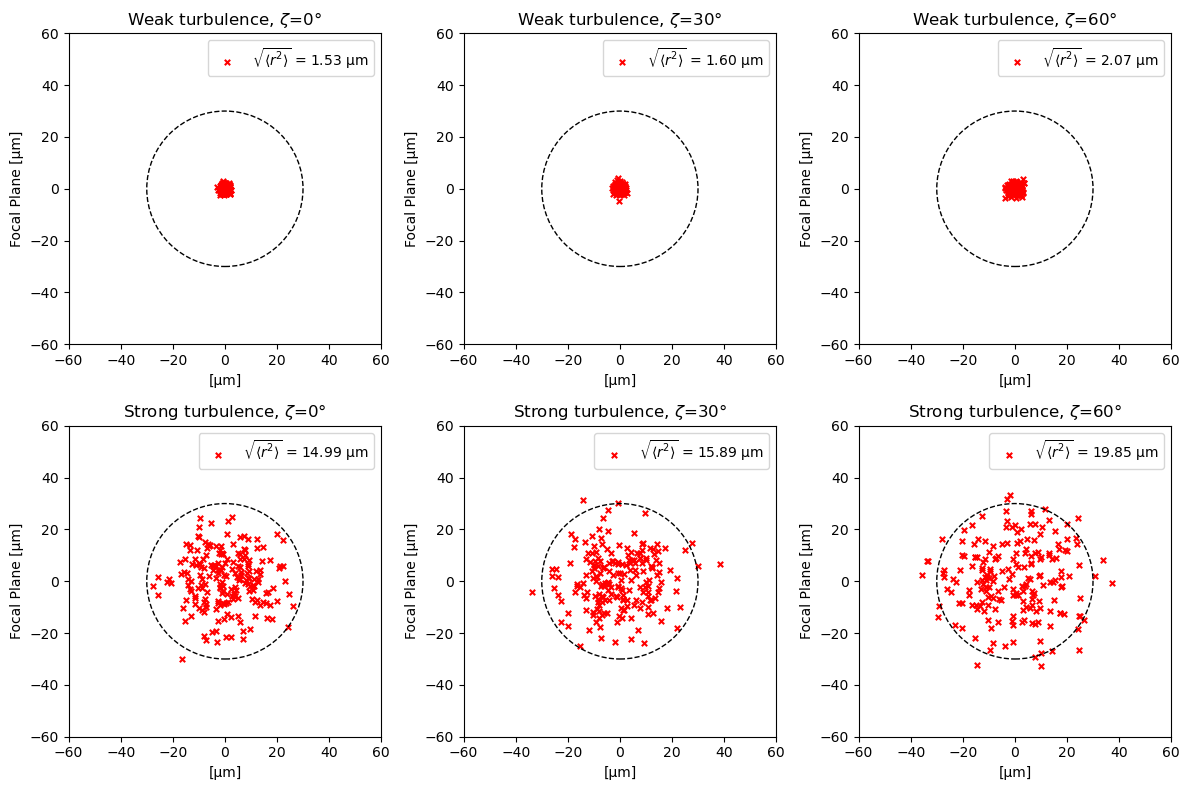

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
lam = 1550e-9      # wavelength [m]
D = 0.3            # receiver aperture diameter [m]
f = 1              # focal length of receiver optics [m]
h0, H = 10, 10e3   # ground to satellite altitude [m]
det_radius = 30e-6 # Detector radius = 30 µm
N = 200            # number of points to generate

# Atmosphere profile
def Cn2_profile(hh, h0):
    vhh = v_profile(hh, zeta)
    term1 = 1.04e-3 * (9.0 / vhh)**2 * ((hh + hg)/1e5)**10 * np.exp(-(hh+hg)/1200.0)
    term2 = 2.7e-16 * np.exp(-(hh+hg)/1700.0)
    term3 = Cn2_h0 * (h0 / (hh + 1e-9))**(4/3)
    return M * (term1 + term2) + term3

def beta2_rms(zeta):
    """Angular beam wander variance <β²> [rad²]."""
    integral, _ = quad(Cn2_profile, h0, H)
    return 2.91 * (1/np.cos(zeta)) * integral * D**(-1/3)

def r_rms(zeta):
    """Transverse rms displacement at focal plane [m]."""
    beta_rms = np.sqrt(beta2_rms(zeta))
    return f * np.tan(beta_rms)


def generate_points(rms, N):
    sigma = rms/2
    x = np.random.normal(0, sigma, N)
    y = np.random.normal(0, sigma, N)
    rms_calc = np.sqrt(np.mean(x**2 + y**2))
    return x, y, rms_calc

# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

zeniths_deg = [0, 30, 60]
zeta_list = [np.deg2rad(z) for z in zeniths_deg]

for idx, zeta in enumerate(zeta_list):
    # weak turbulence
    M_weak = 0.1
    Cn2_profile = lambda h: M_weak * 1e-14 * np.exp(-h/1000.0)
    r_rms_val = r_rms(zeta)
    x, y, rms = generate_points(r_rms_val, N)

    ax = axes[0, idx]
    ax.scatter(x*1e6, y*1e6, color='red', marker='x', s=15,
               label=fr'$\sqrt{{\langle r^2 \rangle}}$ = {rms*1e6:.2f} µm')
    circle = plt.Circle((0,0), det_radius*1e6, color='black',
                        linestyle='--', fill=False)
    ax.add_patch(circle)
    ax.set_xlim([-60, 60])
    ax.set_ylim([-60, 60])
    ax.set_title(rf"Weak turbulence, $\zeta$={zeniths_deg[idx]}°")
    ax.set_xlabel("[µm]")
    ax.set_ylabel("Focal Plane [µm]")
    ax.legend()

    # strong turbulence
    M_strong = 10.0
    Cn2_profile = lambda h: M_strong * 1e-14 * np.exp(-h/1000.0)
    r_rms_val = r_rms(zeta)
    x, y, rms = generate_points(r_rms_val, N)

    ax = axes[1, idx]
    ax.scatter(x*1e6, y*1e6, color='r', marker='x', s=15,
               label=fr'$\sqrt{{\langle r^2 \rangle}}$ = {rms*1e6:.2f} µm')
    circle = plt.Circle((0,0), det_radius*1e6, color='black',
                        linestyle='--', fill=False)
    ax.add_patch(circle)
    ax.set_xlim([-60, 60])
    ax.set_ylim([-60, 60])
    ax.set_title(rf"Strong turbulence, $\zeta$={zeniths_deg[idx]}°")
    ax.set_xlabel("[µm]")
    ax.set_ylabel("Focal Plane [µm]")
    ax.legend()

plt.tight_layout()
plt.show()
